In [1]:

from data.data_preparation import prepare_data
import time

start = time.time()
prepare_data()
end = time.time() - start
print('Temps pour la préparation des données :', end)



Air quality data of bj prepared ！
Air quality data of ld prepared ！
Meteo data of bj prepared ！
Meteo data of ld prepared ！
Data splitted into training and test sets !
Temps pour la préparation des données : 363.1708400249481


### Sanity check of the prepared data :
##### We plot the matrices to check where the data is missing

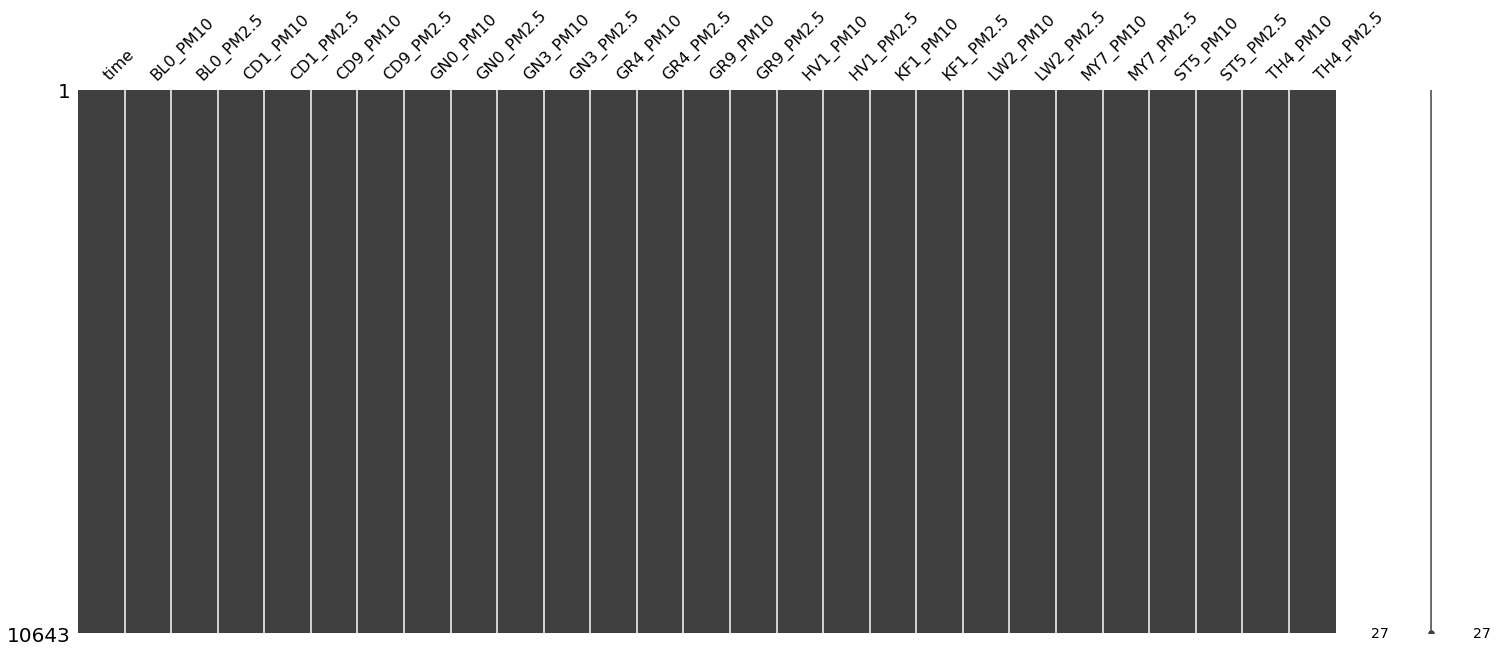

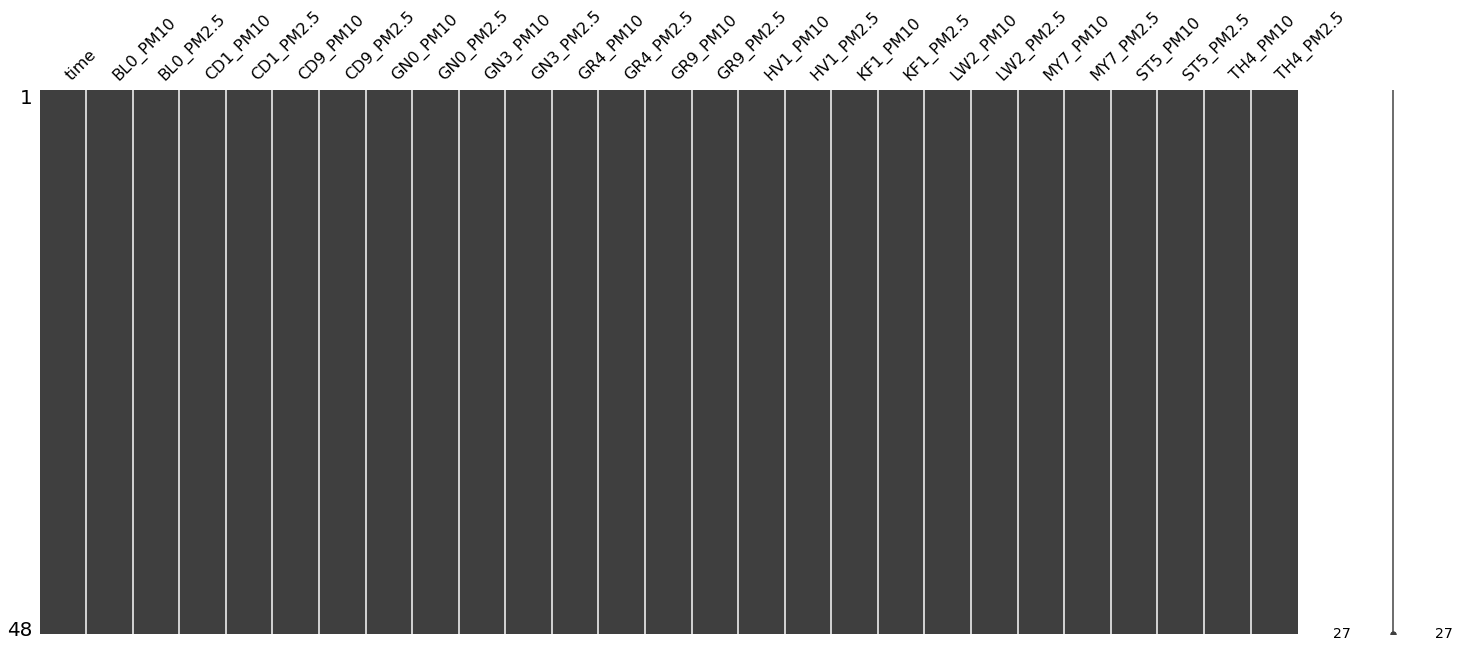

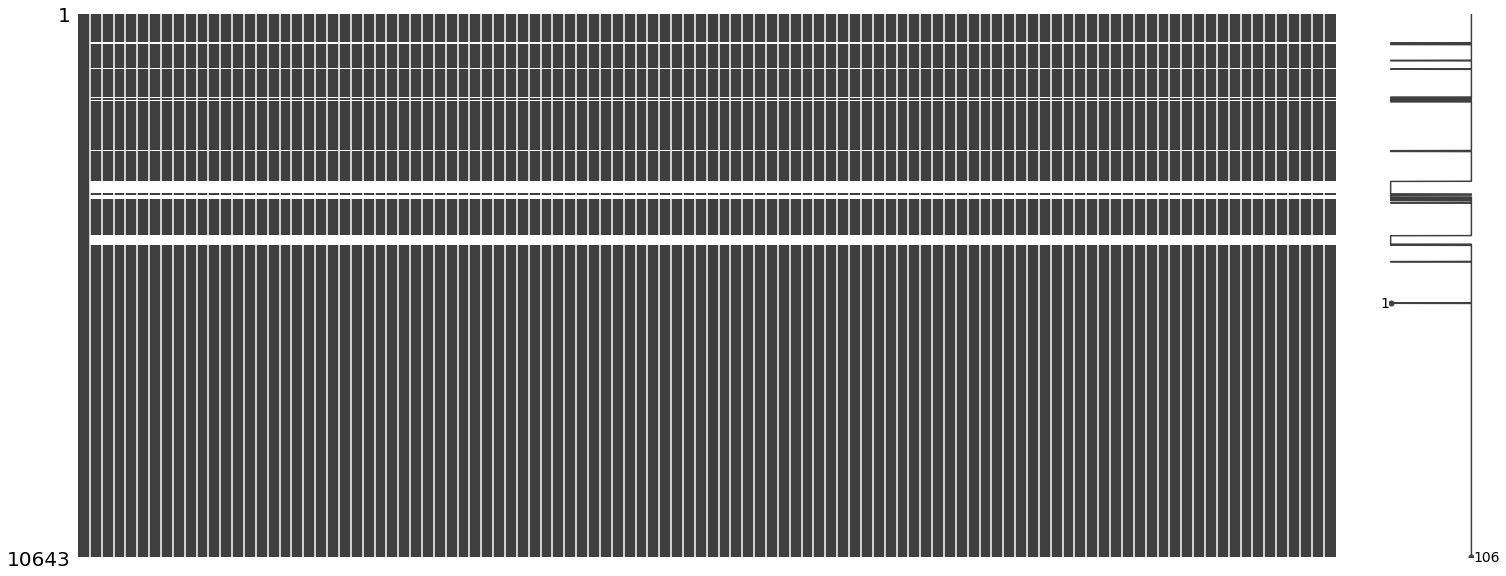

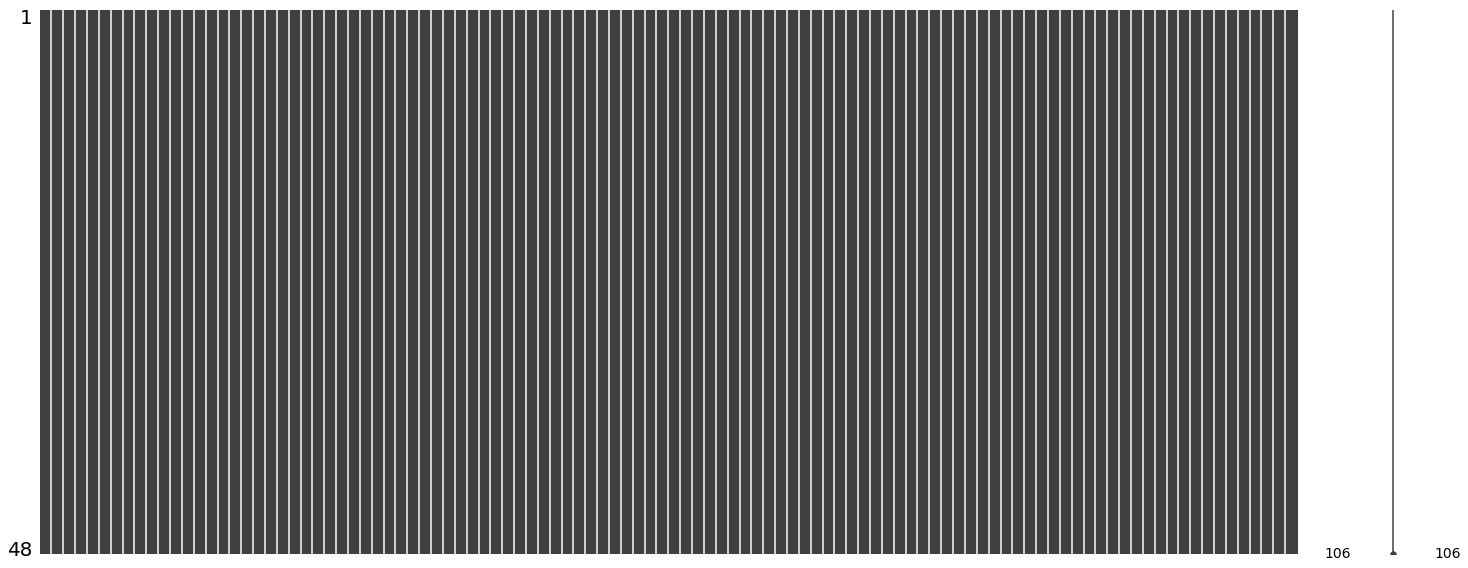

In [2]:
import pandas as pd
import missingno as mso

ld_aq_train_data = pd.read_csv('./prepared_data/ld_aq_train_data.csv')
ld_aq_test_data = pd.read_csv('./prepared_data/ld_aq_test_data.csv')
bj_aq_train_data = pd.read_csv('./prepared_data/bj_aq_train_data.csv')
bj_aq_test_data = pd.read_csv('./prepared_data/bj_aq_test_data.csv')

mso.matrix(ld_aq_train_data)
mso.matrix(ld_aq_test_data)
mso.matrix(bj_aq_train_data)
mso.matrix(bj_aq_test_data)

In [1]:
from dummy_model.dummy_model import predict_dummy
from LSTM_model.kerastest import main

predict_dummy()
main()

Using TensorFlow backend.


ImportError: cannot import name 'temp' from 'LSTM_model.kerastest' (/Users/matthieuvos/UNIGE/3eme_annee_2eme_semestre/data mining/dm-project/LSTM_model/kerastest.py)

26
[1396.6486964426156, 981.8844644505998, 1342.459037720542, 1206.0738857371919, 2119.9924168125517, 1404.907900251492, 1430.9718616262292, 1318.841355452127, 781.5888864067997, 850.6003346135468, 1914.8166073732516, 2247.1559662588484, 1188.6317701119576, 952.2575404638173, 1493.8575638101618, 923.169112796388, 1151.4043771280592, 2063.340393528289, 1707.178200263543, 1601.0475068124308, 940.989943377862, 1283.3212896388056, 1359.8418481115616, 1591.6870813859168, 779.2472062212918, 2021.00940160595, 3117.9725794522924, 1613.5051605719952, 1652.7577834884703, 1486.7985533215563, 1673.2292561654583, 1730.6275767623345, 1134.6221922384245, 1619.8123058868123]
dummy method's predictions results :
PM 2.5 RMSE in London : 25.551654038193174
PM 10 RMSE in London : 112.95012886940741
PM 2.5 RMSE in Beijing : 1138.64675429915
PM 10 RMSE in Beijing : 1823.0411968278036
O3 RMSE in Beijing : 1473.0073545967405


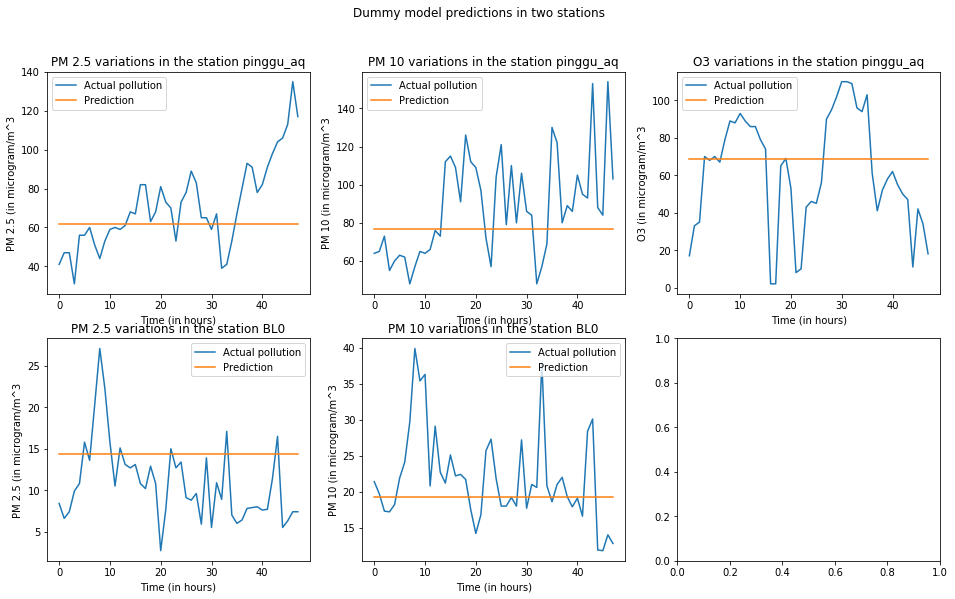

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prediction.compare_predictions import compare_predictions

ld_aq_test_data = pd.read_csv('./prepared_data/ld_aq_test_data.csv')
ld_aq_prediction = pd.read_csv('./prediction/dummy_ld_aq.csv')
bj_aq_test_data = pd.read_csv('./prepared_data/bj_aq_test_data.csv')
bj_aq_prediction = pd.read_csv('./prediction/dummy_bj_aq.csv')

compare_predictions("dummy")

fig, axs = plt.subplots(2,3,figsize=(16,9))
bl0_actual_pm25 = ld_aq_test_data['BL0_PM2.5'].plot(ax=axs[1,0], label='Actual pollution')
bl0_prediction_pm25 = ld_aq_prediction['BL0_PM2.5'].plot(ax=axs[1,0], label='Prediction')
axs[1,0].set_title('PM 2.5 variations in the station BL0')
axs[1,0].set_xlabel('Time (in hours)')
axs[1,0].set_ylabel('PM 2.5 (in microgram/m^3')
axs[1,0].legend(loc='best')


pinggu_aq_actual_pm25 = bj_aq_test_data['pinggu_aq_PM2.5'].plot(ax=axs[0,0], label='Actual pollution')
pinggu_aq_prediction_pm25 = bj_aq_prediction['pinggu_aq_PM2.5'].plot(ax=axs[0,0], label='Prediction')
axs[0,0].set_title('PM 2.5 variations in the station pinggu_aq')
axs[0,0].set_xlabel('Time (in hours)')
axs[0,0].set_ylabel('PM 2.5 (in microgram/m^3')
axs[0,0].legend(loc='best')

bl0_actual_pm25 = ld_aq_test_data['BL0_PM10'].plot(ax=axs[1,1], label='Actual pollution')
bl0_prediction_pm25 = ld_aq_prediction['BL0_PM10'].plot(ax=axs[1,1], label='Prediction')
axs[1,1].set_title('PM 10 variations in the station BL0')
axs[1,1].set_xlabel('Time (in hours)')
axs[1,1].set_ylabel('PM 10 (in microgram/m^3')
axs[1,1].legend(loc='best')

pinggu_aq_actual_pm25 = bj_aq_test_data['pinggu_aq_PM10'].plot(ax=axs[0,1], label='Actual pollution')
pinggu_aq_prediction_pm25 = bj_aq_prediction['pinggu_aq_PM10'].plot(ax=axs[0,1], label='Prediction')
axs[0,1].set_title('PM 10 variations in the station pinggu_aq')
axs[0,1].set_xlabel('Time (in hours)')
axs[0,1].set_ylabel('PM 10 (in microgram/m^3')
axs[0,1].legend(loc='best')


pinggu_aq_actual_pm25 = bj_aq_test_data['pinggu_aq_O3'].plot(ax=axs[0,2], label='Actual pollution')
pinggu_aq_prediction_pm25 = bj_aq_prediction['pinggu_aq_O3'].plot(ax=axs[0,2], label='Prediction')
axs[0,2].set_title('O3 variations in the station pinggu_aq')
axs[0,2].set_xlabel('Time (in hours)')
axs[0,2].set_ylabel('O3 (in microgram/m^3')
axs[0,2].legend(loc='best')

fig.suptitle('Dummy model predictions in two stations')
fig.savefig('dummy_prediction.png')